# 트리 순회
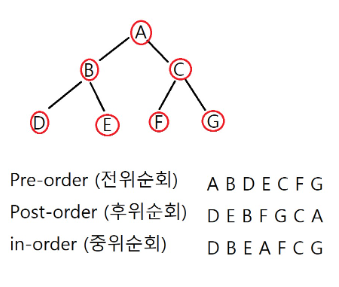
- 전위 순회(Preorder) : Root - Left - Right
- 후위 순회(Postorder) : Left - Right - Root
- 중위 순회(Inorder) : Left - Root - Right

In [ ]:
def order(now):
    if now > len(arr) - 1:
        return
    # 전위
    order(now*2)  # left
    # 중위
    order(now*2+1)  # right
    # 후위

order(1)

In [ ]:
arr = ' ABCDEFG'

# 전위 순회
def preorder(now):
    if now > len(arr)-1 :
        return
    print(arr[now], end=' ')
    preorder(now*2)
    preorder(now*2 + 1)

preorder(1)  # A B D E C F G
print()

# 후위 순회
def postorder(now):
    if now > len(arr)-1 :
        return
    postorder(now*2)
    postorder(now*2 + 1)
    print(arr[now], end=' ')

postorder(1)  # D E B F G C A
print()

# 중위 순회
def inorder(now):
    if now > len(arr)-1 :
        return
    inorder(now*2)
    print(arr[now], end=' ')
    inorder(now*2 + 1)

inorder(1)  # D B E A F C G 
print()


# BST (Binary Search Tree)
- 빠른 탐색을 위한 자료 구조
    - 최선 : O(logn)
    - 최악 : O(n)
- 선형 리스트 값을 트리 구조로 저장 후 탐색
    - 부모보다 작으면 왼쪽, 크면 오른쪽에 저장
- cf) redblack tree : 완벽한 이진트리 구조(balanced tree)로 만들어 줌.

In [8]:
lst = [4, 7, 2, 9, 3, 1, 6]
arr = [0]*20

# 1. 트리의 모양으로 lst 값 저장
def insert(target):
    now = 1
    while True:
        # 루트 노드가 비어있다면 값을 저장
        if arr[now] == 0:
            arr[now] = target
            return
        # 부모보다 클 경우 오른쪽에 저장
        if arr[now] < target:  
            now = now*2 + 1
        # 부모보다 작을 경우 왼쪽에 저장
        else:  
            now = now*2

for i in range(len(lst)):
    insert(lst[i])  


# 2. 원하는 값 찾기
def search(target):
    now = 1
    while True:
        # now가 배열의 범위를 벗어나면 없다는 의미이므로 0 리턴
        if now >= 20:
            return 0
        # 타겟이 없으면 0 리턴
        if arr[now] == 0:
            return 0
        # 타겟을 찾으면 1 리턴
        if arr[now] == target:
            return 1
        if arr[now] < target:
            now = now*2 + 1
        else:
            now = now*2

n = int(input())
ret = search(n)
if ret == 1:
    print("존재함")
else:
    print("없는 숫자")

존재함


# Heap
- BST처럼 자료를 이진트리 형태로 저장
- 사용자 우선순위에 따라 값 출력
- 시간복잡도 : O(logn)
- max heap 
    - 부모 노드의 값이 자식 노드의 값보다 커야 함 
    - 자식이 부모보다 크면 swap

In [9]:
arr = [3, 7, 1, 4, 7, 31, 8]
heap = [0]*30  # Maxheap
hindex = 1  # 1번 인덱스에 첫 값 저장하기 위함

# 1. 트리에 저장
def insert(value):
    global hindex
    heap[hindex] = value  # root 노드
    now = hindex
    hindex += 1
    while True:
        p = now//2  # 부모 인덱스 구하기
        if p == 0: break  # 만약 부모인덱스가 0이라면 (now는 루트노드) 비교할것 없으므로 break
        if heap[p] >= heap[now]: break  # 부모 값이 더 클 때
        heap[p], heap[now] = heap[now], heap[p]  # 자식 값이 더 클 때 swap
        now = p  # 부모가 그 다음의 now가 됨 (부모가 부모의 부모와 비교를 실행)

for i in range(len(arr)):
    insert(arr[i])

# 2. 출력하기
def top():
    return heap[1]

def pop():
    global hindex
    heap[1] = heap[hindex-1]  # 맨 뒤 값을 루트로 올리고
    heap[hindex] = 0  # 맨 뒤 값을 0으로 바꿈
    hindex -= 1  # hindex 값 감소
    now = 1  # 루트부터 자식들이랑 비교하기 위해서 now를 1로 세팅
    while True:
        son = now*2  # 왼쪽 자식
        rson = now*2 + 1  # 오른쪽 자식
        # 자식이 있고 오른쪽 자식이 왼쪽 자식보다 크면 
        if son <= hindex and heap[son] < heap[rson]:
            son = rson
        # 자식이 없거나 부모가 자식보다 더 크다면 break
        if son > hindex or heap[now] > heap[son]:
            break
        heap[now], heap[son] = heap[son], heap[now]
        now = son

for i in range(len(arr)):
    print(top(), end=' ')
    pop()


31 8 7 7 4 3 1 